## Research Qestion (Q2)
How has Netflix's content become more global over time in term of production countries?

In [1]:
import pandas as pd

# Relative path
movies_path = "../data/raw/netflix_movies_detailed_up_to_2025.csv"
tv_path = "../data/raw/netflix_tv_shows_detailed_up_to_2025.csv"

movies_df = pd.read_csv(movies_path)
tv_df = pd.read_csv(tv_path)

In [3]:
# Combine datasets
movies_df["type"] = "M"
tv_df["type"] = "T"
content_df = pd.concat([movies_df, tv_df], ignore_index=True)

# Convert date_added to datetime
content_df["date_added"] = pd.to_datetime(content_df["date_added"], errors="coerce")

# Extract year and month
content_df["year_added"] = content_df["date_added"].dt.year
content_df["month_added"] = content_df["date_added"].dt.to_period("M")

# Drop rows without required fields
content_df = content_df.dropna(subset=["year_added", "country"]).copy()

# Split and explode country column
content_df["country"] = content_df["country"].astype(str)
content_df["country_list"] = content_df["country"].str.split(",")
content_df = content_df.explode("country_list")

# Clean country names
content_df["country_list"] = content_df["country_list"].str.strip()
content_df["country_list"] = content_df["country_list"].replace({
    "United States": "US",
    "United States of America": "US",
    "United Kingdom": "UK",
    "South Korea": "Korea"
})

# Drop unused columns
content_df = content_df.drop(columns=["date_added", "release_year"], errors="ignore")

# Quick check
content_df[["type", "year_added", "month_added", "country_list"]].head()

,type,year_added,month_added,country_list
0,M,2010,2010-05,US
1,M,2010,2010-07,UK
1,M,2010,2010-07,US
2,M,2010,2010-11,UK
2,M,2010,2010-11,US


In [4]:
# Count number of unique production countries per year
countries_by_year = (
    content_df
    .groupby("year_added")["country_list"]
    .nunique()
    .reset_index(name="num_countries")
)

countries_by_year.head()

,year_added,num_countries
0,2010,69
1,2011,85
2,2012,74
3,2013,72
4,2014,81


The number of production countries contributing to Netflix content fluctuates over time rather than showing a steady upward trend. However, across all years, Netflix consistently sources content from a large and diverse set of countries, typically ranging between 70 and 85. This suggests that Netflix’s global reach is not the result of gradual expansion, but rather reflects a stable and well-established level of international content production.

In [5]:
# Count unique production countries per year by content type
countries_by_year_type = (
    content_df
    .groupby(["year_added", "type"])["country_list"]
    .nunique()
    .reset_index(name="num_countries")
)

countries_by_year_type.head()

,year_added,type,num_countries
0,2010,M,56
1,2010,T,58
2,2011,M,74
3,2011,T,66
4,2012,M,65


This aggregation measures the geographic breadth of Netflix’s content by counting the number of distinct production countries per year for movies and TV shows separately. Instead of focusing on the number of titles, this metric emphasizes diversity in production origins, which is a more appropriate indicator of globalization. Comparing these values across years and content types helps identify whether Netflix’s globalization strategy differs between movies and TV shows, and whether it evolves through expansion, stabilization, or selective concentration over time.

In [6]:
# Pivot table for visualization
countries_pivot = (
    countries_by_year_type
    .pivot(index="year_added", columns="type", values="num_countries")
    .fillna(0)
)

countries_pivot.head()

type,M,T
year_added,,
2010,56,58
2011,74,66
2012,65,56
2013,65,55
2014,64,67


This pivot table summarizes the number of distinct production countries per year, separated by content type (Movies and TV Shows). By restructuring the data into a year-by-type format, it enables direct comparison of geographic diversity between movies and TV shows within the same time period. Rather than measuring globalization through the sheer volume of titles, this aggregation focuses on the breadth of production origins, which serves as a more meaningful indicator of Netflix’s global content strategy. Examining these trends over time helps reveal whether Netflix’s approach to globalization is characterized by continuous expansion, long-term stabilization, or selective concentration, and whether these patterns differ between movies and TV shows.

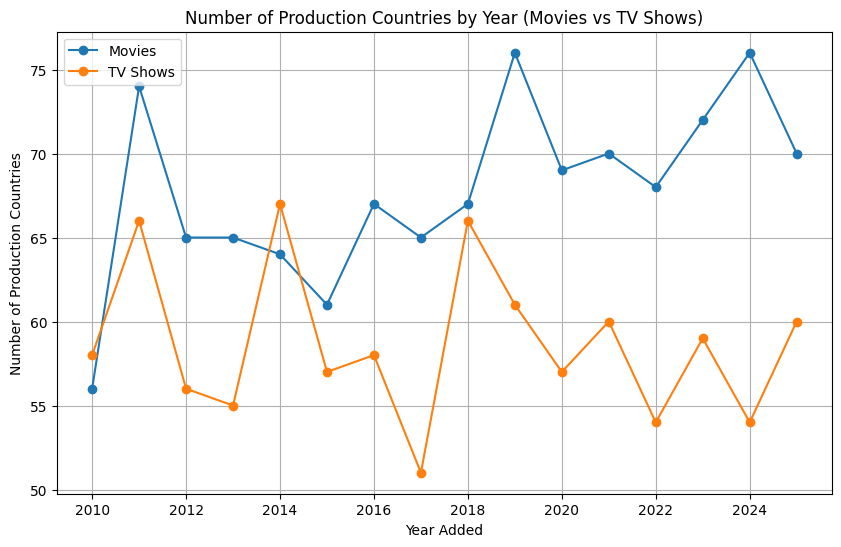

In [7]:
import matplotlib.pyplot as plt

# Create line chart for number of production countries over time
plt.figure(figsize=(10, 6))

# Plot Movie line
plt.plot(
    countries_pivot.index,
    countries_pivot["M"],
    marker="o",
    label="Movies"
)

# Plot TV Show line
plt.plot(
    countries_pivot.index,
    countries_pivot["T"],
    marker="o",
    label="TV Shows"
)

# Chart formatting
plt.title("Number of Production Countries by Year (Movies vs TV Shows)")
plt.xlabel("Year Added")
plt.ylabel("Number of Production Countries")
plt.legend()
plt.grid(True)

plt.show()

The line chart shows that Netflix maintains a consistently broad set of production countries for both movies and TV shows over time. Rather than exhibiting continuous expansion, the number of countries fluctuates within a stable range, suggesting that Netflix established its global production network relatively early. Movies consistently involve a wider set of countries than TV shows, indicating that films serve as a more flexible channel for global experimentation, while TV content follows a more stable and concentrated production strategy.

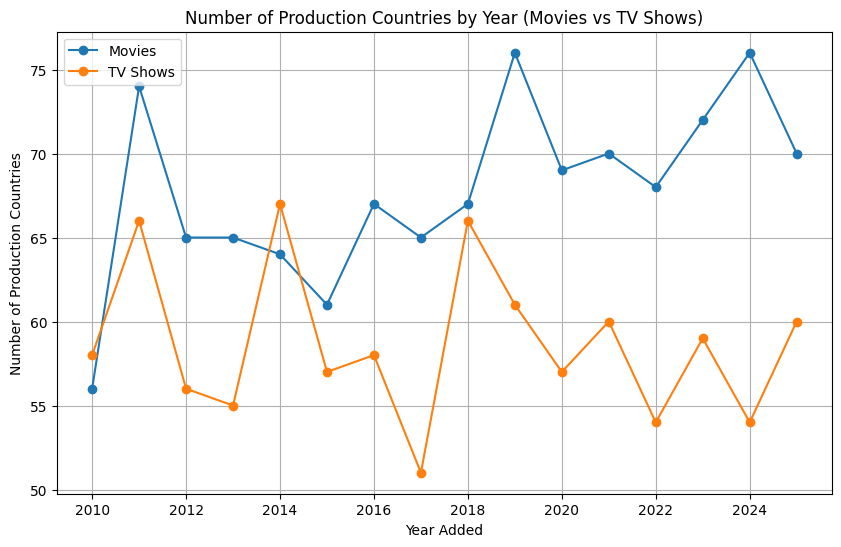

In [8]:
import matplotlib.pyplot as plt

# Create line chart for number of production countries over time
plt.figure(figsize=(10, 6))

# Plot Movie line
plt.plot(
    countries_pivot.index,
    countries_pivot["M"],
    marker="o",
    label="Movies"
)

# Plot TV Show line
plt.plot(
    countries_pivot.index,
    countries_pivot["T"],
    marker="o",
    label="TV Shows"
)

# Chart formatting
plt.title("Number of Production Countries by Year (Movies vs TV Shows)")
plt.xlabel("Year Added")
plt.ylabel("Number of Production Countries")
plt.legend()
plt.grid(True)

plt.show()

The number of production countries fluctuates over time rather than showing a steady increase, suggesting that Netflix built a global production base early and later focused on adjustment rather than expansion. Movies consistently involve more production countries than TV shows, indicating greater experimentation in films, while TV shows follow a more stable and concentrated production strategy.

### Analysis Q2

The number of production countries fluctuates over time rather than showing continuous growth, indicating that Netflix prioritizes maintaining and optimizing an already global production network. Movies consistently involve a broader set of production countries than TV shows, suggesting greater flexibility for global experimentation, while TV content reflects a more selective and stability-oriented localization strategy.